# Clustering and Data Visualization


In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pprint import pprint

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'



Each of the seven data sets have three columns:

    x
    y
    label
    
Because they each only have two variables, they're easy to examine visually. I'm going to cluster them based on 'label' and visualize.

In [4]:
flame = pd.read_csv('./datasets/flame.csv')
agg = pd.read_csv('./datasets/aggregation.csv')
comp = pd.read_csv('./datasets/compound.csv')
jain = pd.read_csv('./datasets/jain.csv')
path = pd.read_csv('./datasets/pathbased.csv')
r15 = pd.read_csv('./datasets/r15.csv')
spiral = pd.read_csv('./datasets/spiral.csv')

In [5]:
datasets = [flame, agg, comp, jain, path, r15, spiral]

In [6]:
ss = StandardScaler()
for i in datasets:
    ss.fit_transform(i[['x', 'y']])
    

# Plotting each of the data sets with colored true labels.

Plotted by cluster

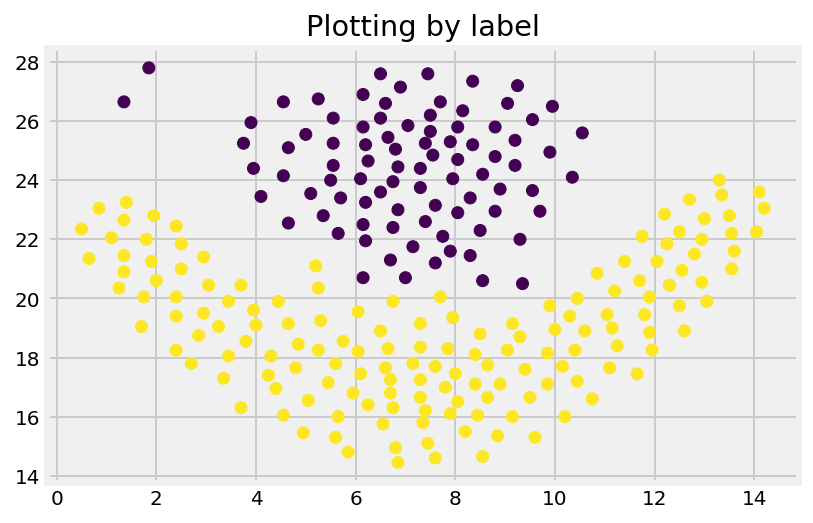

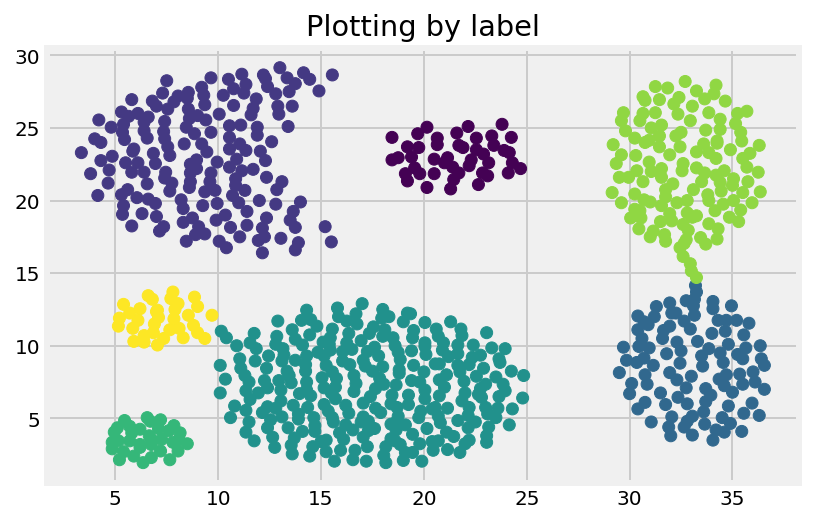

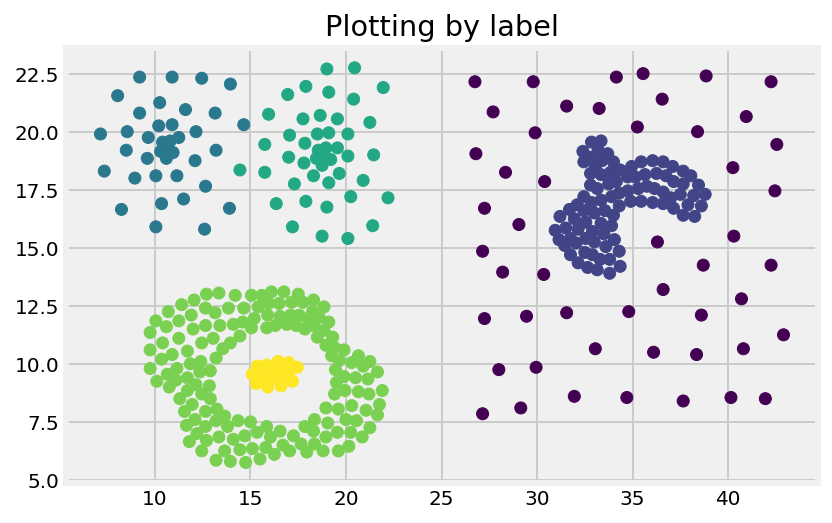

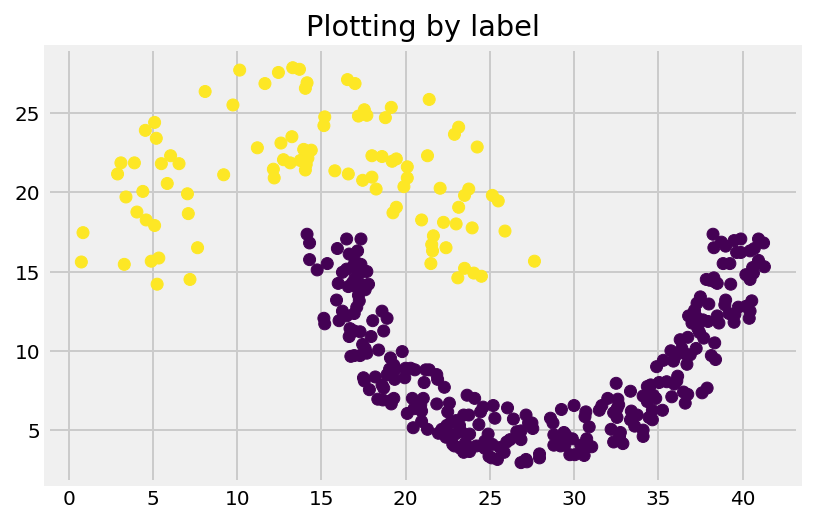

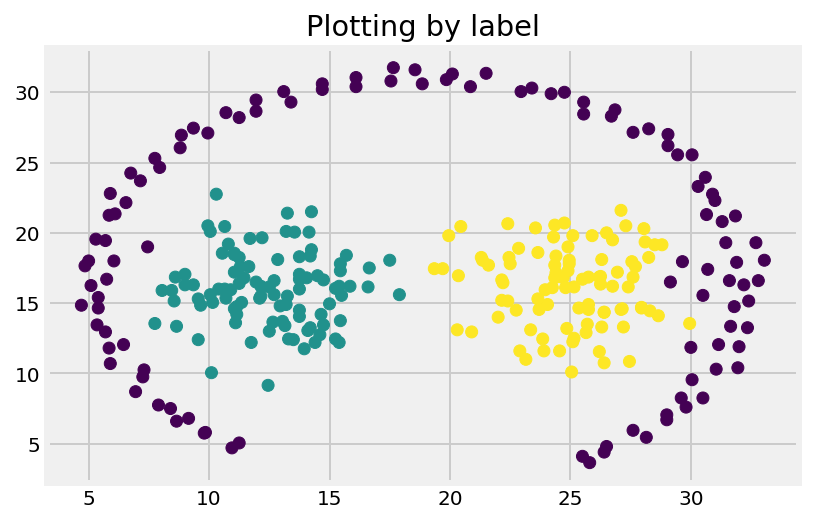

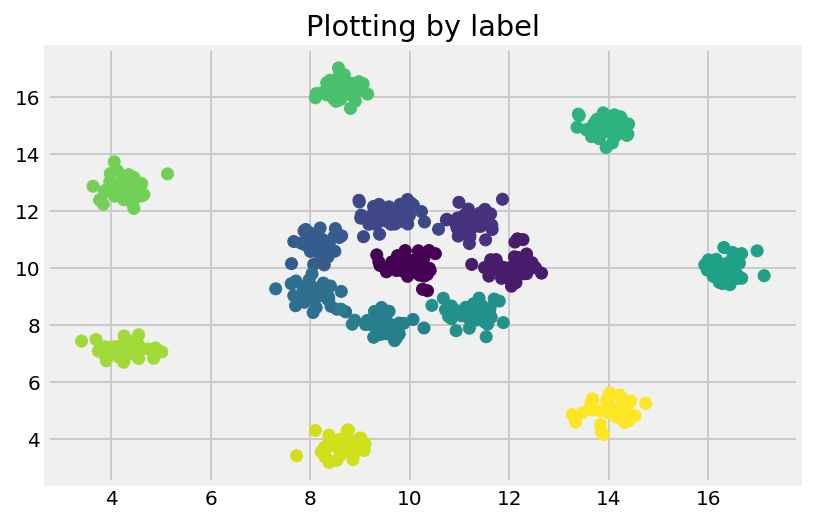

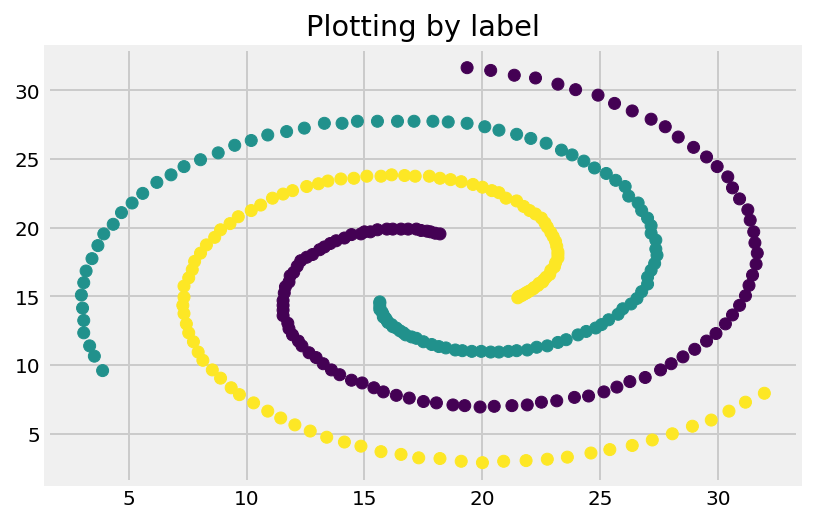

In [87]:
for i in datasets:
    plt.title('Plotting by label')
    plt.scatter(i['x'], i['y'], c= i['label']) 
    plt.show()


### 3) Plotting function to model each cluster dataset with parameters

    K-means: k-means clustering.
    Agglomerative clustering: hierarchical clustering (bottom up).
    DBSCAN: density-based clustering.
   

    K-means:
        k_clusters
    Agglomerative clustering:
        c_clusters
    DBSCAN
        eps
        min_samples
        


In [7]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

kmeans = KMeans()
agglo = AgglomerativeClustering()
db = DBSCAN()


In [137]:
def cluster_performer(kclusters, aclusters, db_eps, db_min_samples):
    for i in datasets:
        name =[x for x in globals() if globals()[x] is i][0]
        x = i['x']
        X = i[['x', 'y']]
        y = i['y']
        c = i['label']
        kmeans = KMeans(n_clusters= kclusters).fit(i)
        kmean_labs = kmeans.labels_
        kmeans_plot= i.plot(x='x', y='y', kind='scatter', c=kmeans.labels_, cmap= 'viridis')
        
        kmeans_plot.set_title('Kmeans, {}'.format(name))
        
        agglo = AgglomerativeClustering(n_clusters=aclusters).fit(i)
        agglo_plot = i.plot(x='x', y='y', kind='scatter', c=agglo.labels_, cmap= 'viridis')
        agglo_plot.set_title('Agglomerative Clustering, {}'.format(name))
        
        db = DBSCAN(eps = db_eps, min_samples= db_min_samples).fit(i)
        db_plot = i.plot(x='x', y='y', kind='scatter',c= db.labels_, cmap= 'viridis')
        db_plot.set_title('DBSCAN {}'.format(name))

/Users/adamkrauss/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


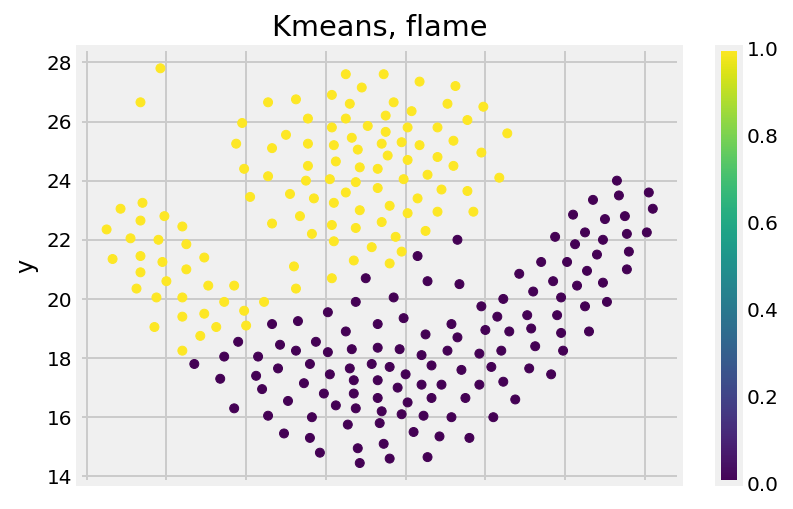

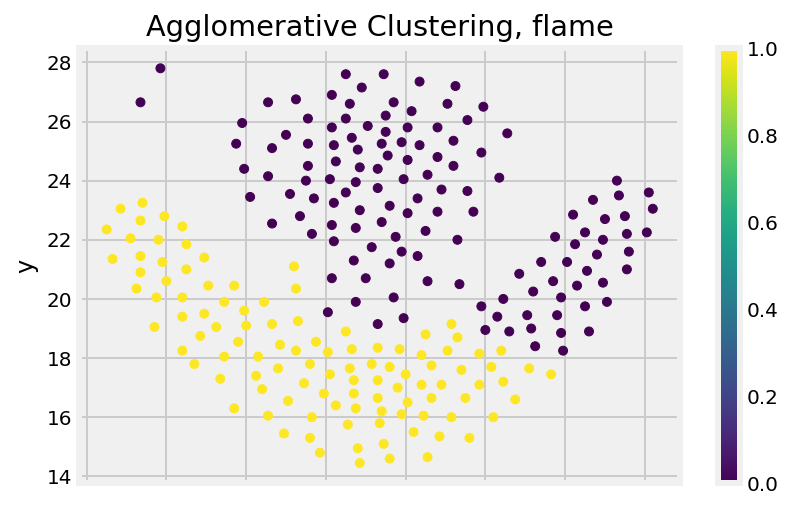

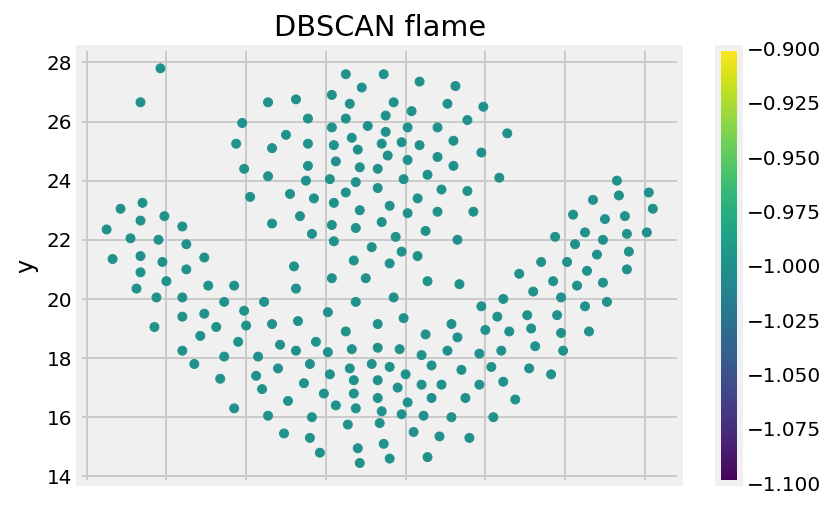

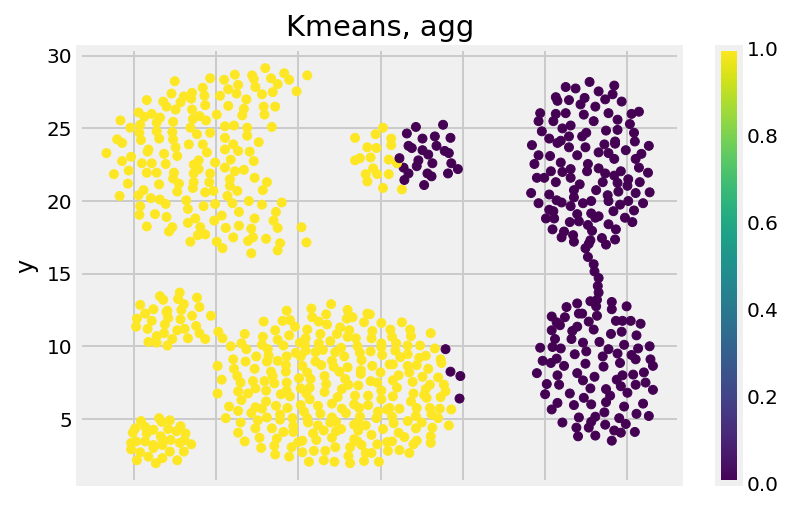

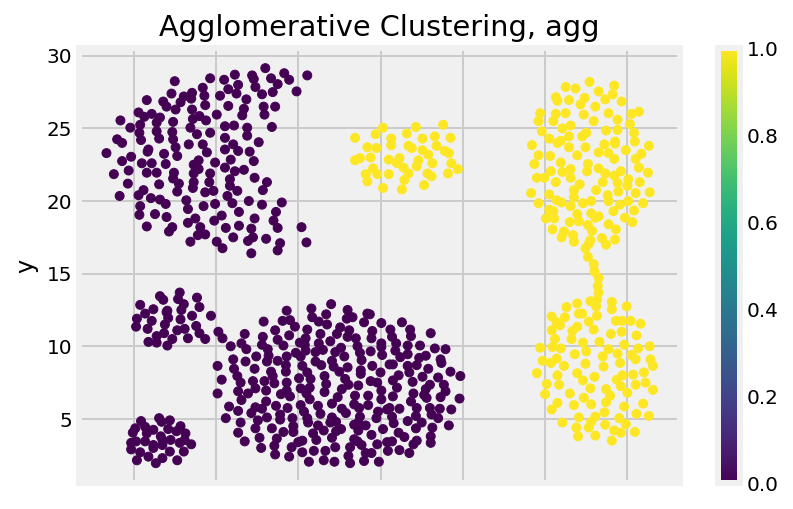

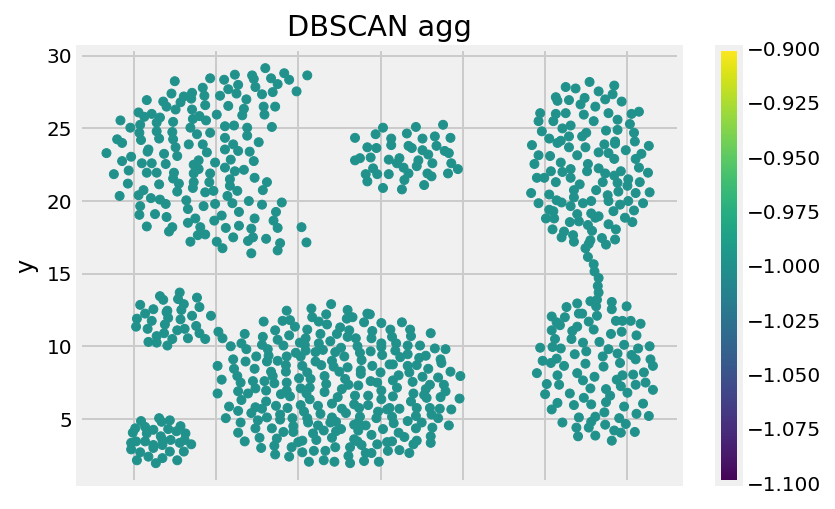

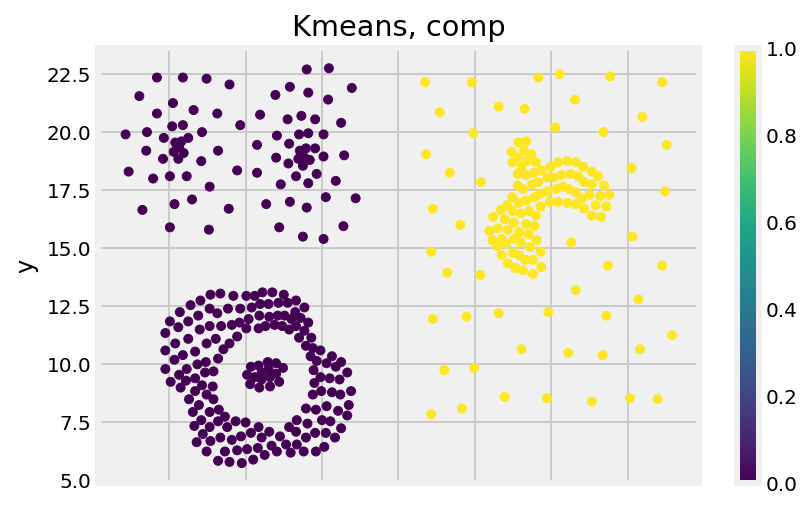

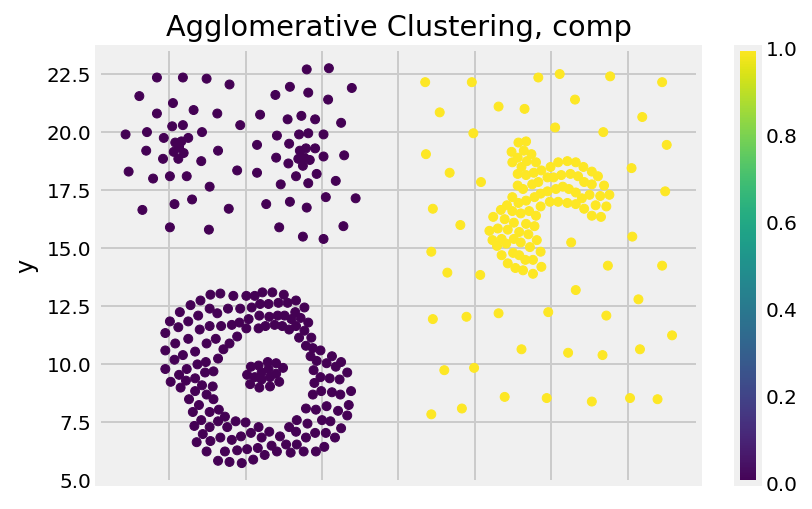

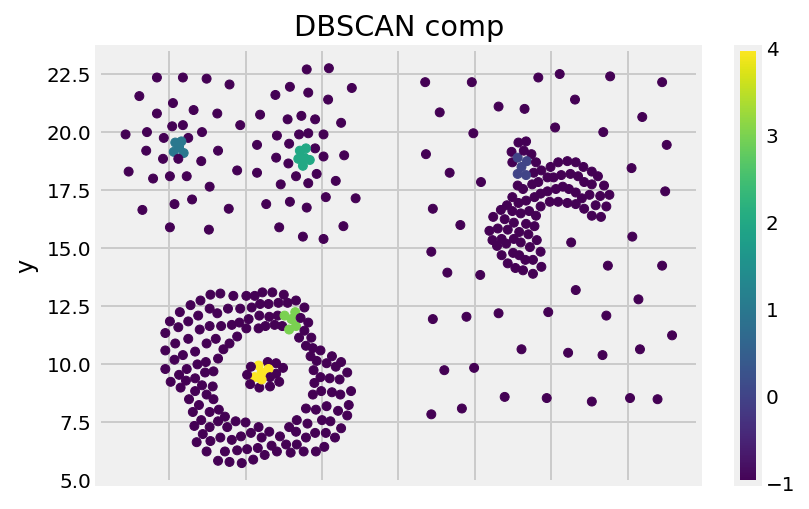

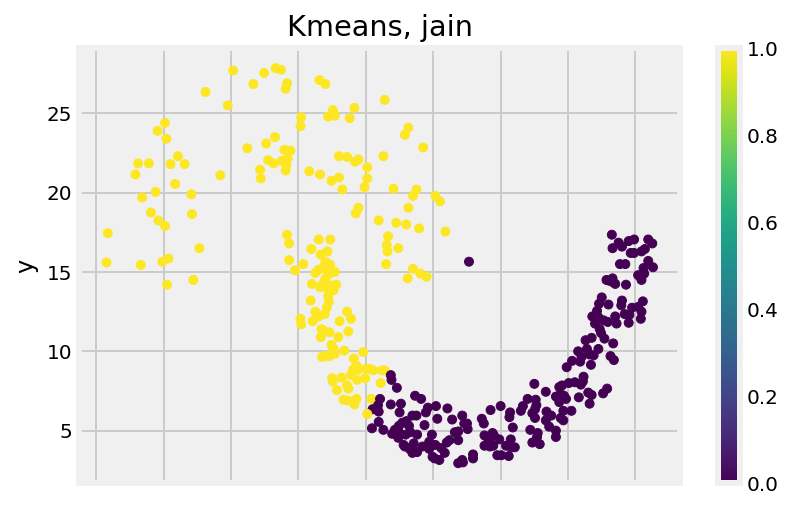

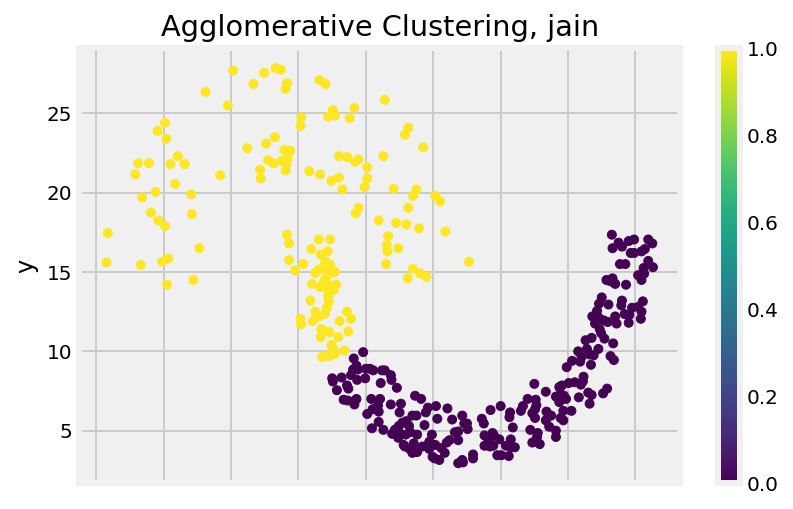

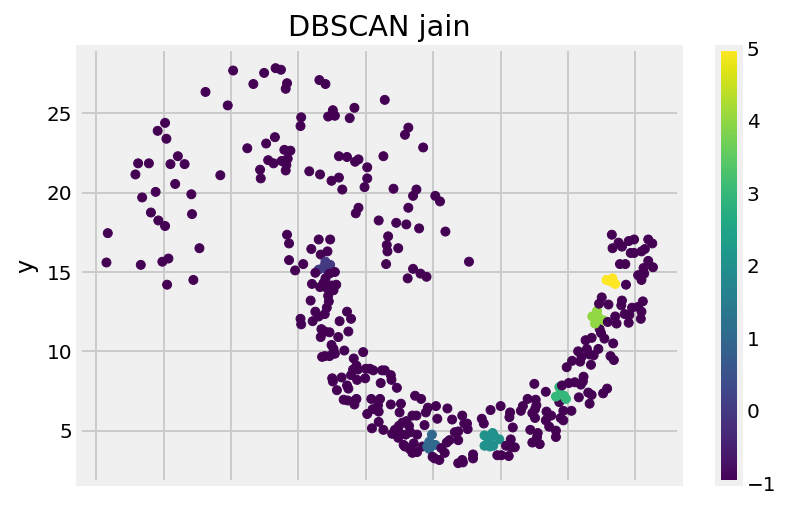

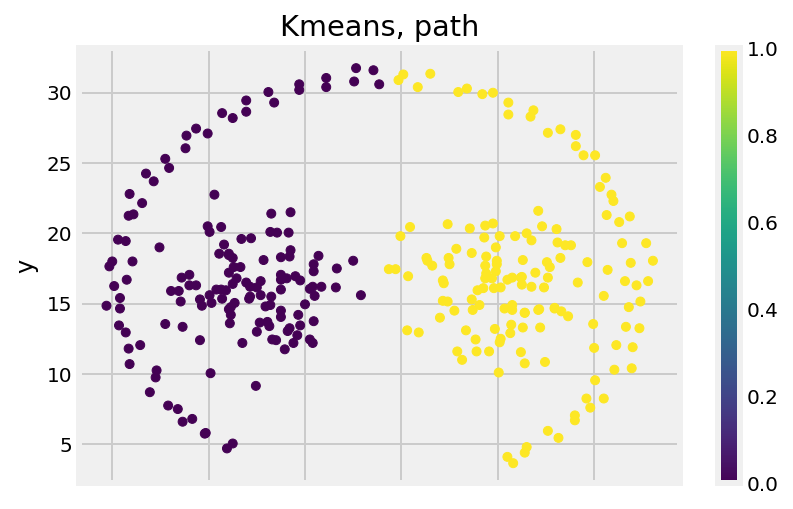

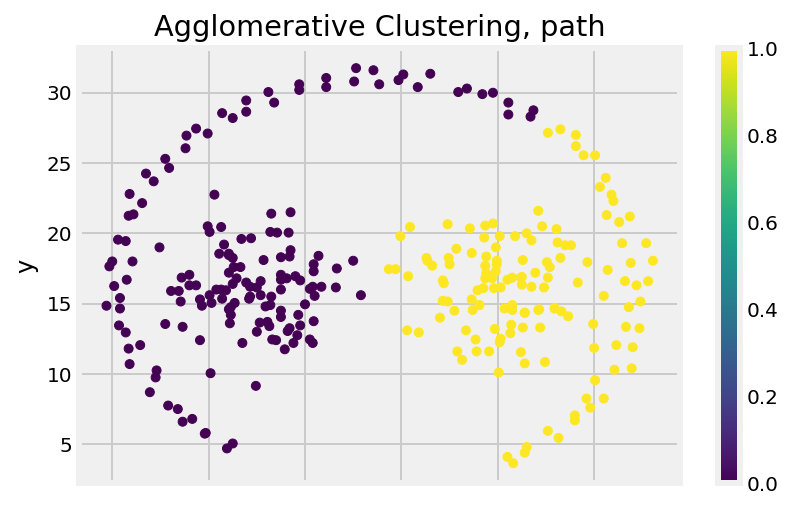

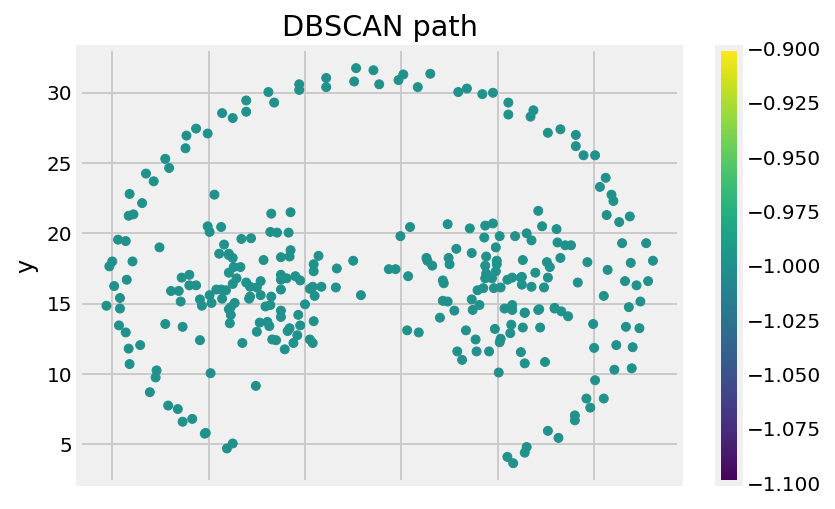

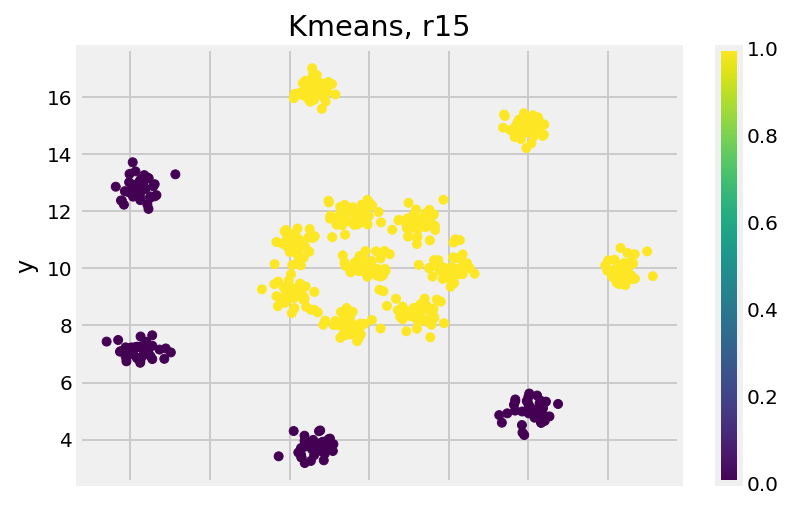

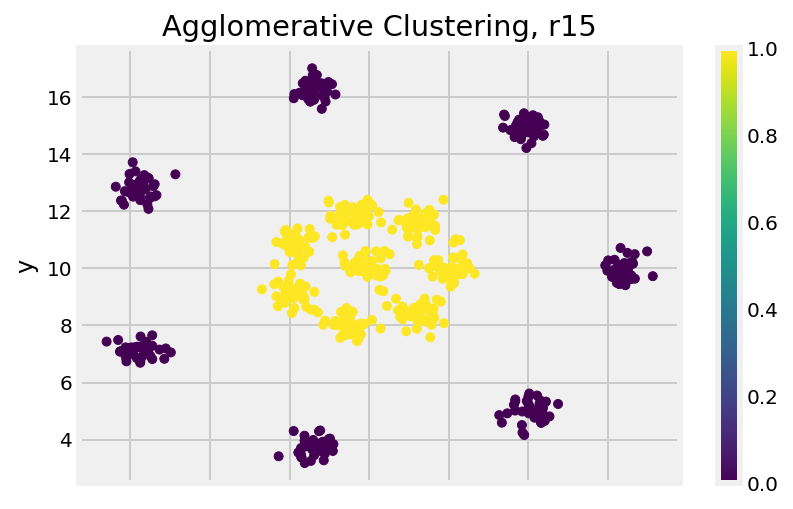

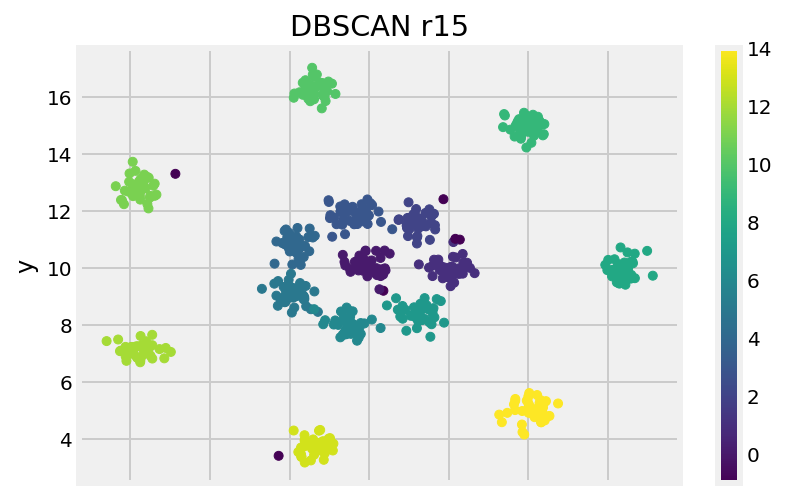

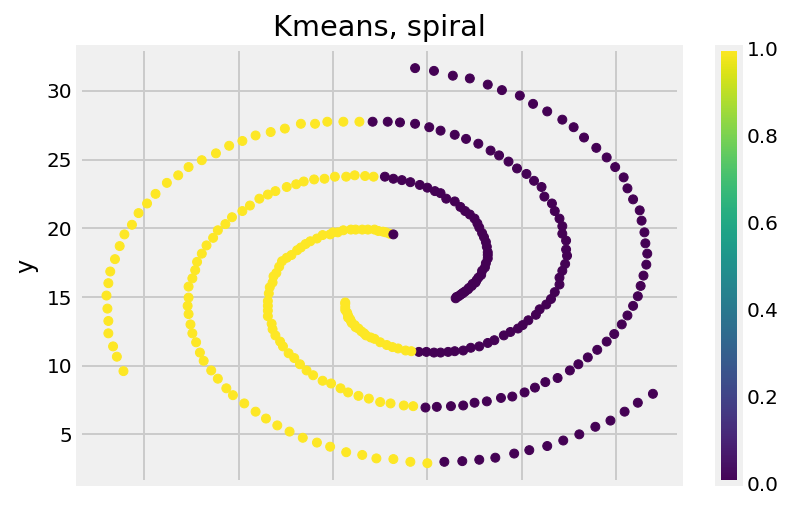

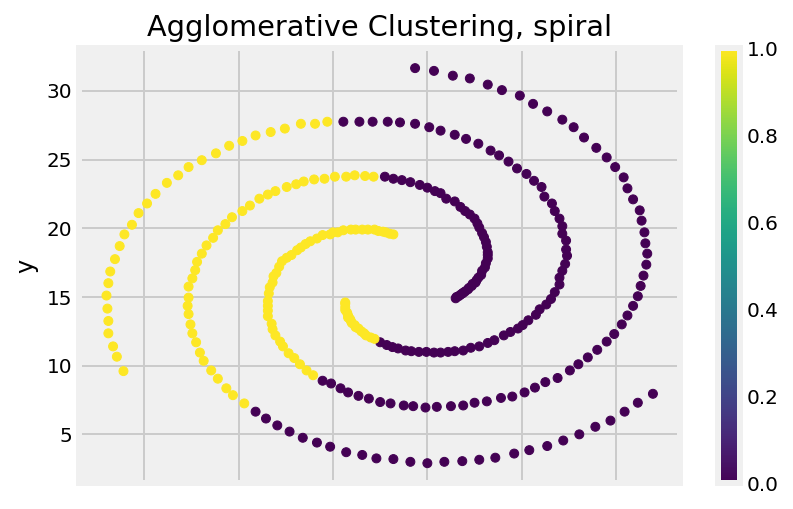

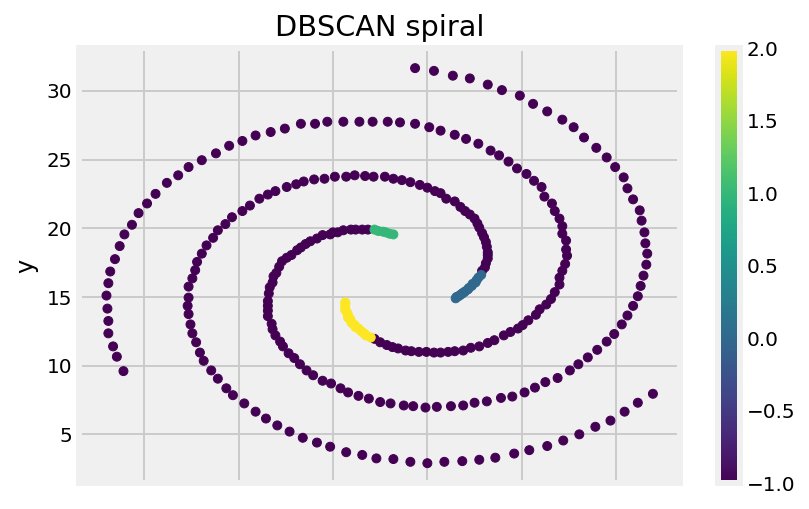

In [136]:
cluster_performer(2, 1, .5, 5)

I am tinkering function parameters to see different groups,  helping my unsupervised learning model